# Homework 0
In this homework, we will go through basic linear algebra, NumPy, and image manipulation using Python to get everyone on the same page for the prerequisite skills for this class.

One of the aims of this homework assignment is to get you to start getting comfortable searching for useful library functions online. So in many of the functions you will implement, you will have to look up helper functions.

# Setup

###**Step 1**
First, run the cells below to clone the `CS131_release` [repo](https://github.com/StanfordVL/CS131_release) and `cd` into the correct directory in order to access some necessary files.




In [ ]:
import os

# if not os.path.exists("CS131_release"):
#     # Clone the repository if it doesn't already exist
#     !git clone https://github.com/StanfordVL/CS131_release.git

In [ ]:
# %cd CS131_release/winter_2025/hw0_release/

###**Step 2**
Next, run the cells below to install the necessary libraries and packages.

In [ ]:
# Install the necessary dependencies
# (restart your runtime session if prompted to, and then re-run this cell)
# !pip install --upgrade pip setuptools wheel
# !pip install pywinpty

!pip install -r requirements.txt

In [71]:
# Imports the print function from newer versions of python
from __future__ import print_function


# The Random module implements pseudo-random number generators
import random

# Numpy is the main package for scientific computing with Python.
# This will be one of our most used libraries in this class
import numpy as np

# The Time library helps us time code runtimes
import time

import skimage

# PIL (Pillow) is a useful library for opening, manipulating, and saving images
from PIL import Image

# skimage (Scikit-Image) is a library for image processing
from skimage import color, io

# Matplotlib is a useful plotting library for python
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Question 1: Linear Algebra and NumPy Review
In this section, we will review linear algebra and learn how to use vectors and matrices in python using numpy.

## Question 1.1 (5 points)
First, let's test whether you can define the following matrices and vectors using numpy. Look up `np.array()` for help. In the next code block, define $M$ as a $(4, 3)$ matrix, $a$ as a $(1, 3)$ row vector and $b$ as a $(3, 1)$ column vector:

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \end{bmatrix}
$$

$$a = \begin{bmatrix}
1 & 1 & 0
\end{bmatrix}
$$

$$b = \begin{bmatrix}
-1 \\ 2 \\ 5
\end{bmatrix}  
$$

In [56]:
M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

a = np.array([[1,1,0]])
b = np.array([[-1],[2],[5]])

print("M = \n", M)
print("The size of M is: ", M.shape)
print()
print("a = ", a)
print("The size of a is: ", a.shape)
print()
print("b = ", b)
print("The size of b is: ", b.shape)

M = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
The size of M is:  (4, 3)

a =  [[1 1 0]]
The size of a is:  (1, 3)

b =  [[-1]
 [ 2]
 [ 5]]
The size of b is:  (3, 1)


## Question 1.2 (5 points)
Implement the `dot_product()` method below and check that it returns the correct answer for $a^Tb$.

In [57]:
def dot_product(a, b):
    """Implement dot product between the two vectors: a and b.

    (optional): While you can solve this using for loops, we recommend
    that you look up `np.dot()` online and use that instead.

    Args:
        a: numpy array of shape (x, n)
        b: numpy array of shape (n, x)

    Returns:
        out: numpy array of shape (x, x) (scalar if x = 1)
    """

    return np.dot(a, b)

In [58]:
# Now, let's test out this dot product. Your answer should be [[1]].
aDotB = dot_product(a, b)
print(aDotB)

print("The size is: ", aDotB.shape)

[[1]]
The size is:  (1, 1)


## Question 1.3 (5 points)
Implement the `complicated_matrix_function()` method below and use it to compute $(ab)Ma^T$

IMPORTANT NOTE: The `complicated_matrix_function()` method expects all inputs to be two dimensional numpy arrays, as opposed to 1-D arrays.  This is an important distinction, because 2-D arrays can be transposed, while 1-D arrays cannot.

To transpose a 2-D array, you can use the syntax `array.T`

In [61]:
def complicated_matrix_function(M, a, b):
    """Implement (a * b) * (M * a.T).

    (optional): Use the `dot_product(a, b)` function you wrote above
    as a helper function.

    Args:
        M: numpy matrix of shape (x, n).
        a: numpy array of shape (1, n).
        b: numpy array of shape (n, 1).

    Returns:
        out: numpy matrix of shape (x, 1).
    """

    return dot_product(a, b) * dot_product(M, a.T)

In [62]:
# Your answer should be $[[3], [9], [15], [21]]$ of shape(4, 1).
ans = complicated_matrix_function(M, a, b)
print(ans)
print()
print("The size is: ", ans.shape)

[[ 3]
 [ 9]
 [15]
 [21]]

The size is:  (4, 1)


In [63]:
M_2 = np.array(range(4)).reshape((2,2))
a_2 = np.array([[1,1]])
b_2 = np.array([[10, 10]]).T
print(M_2.shape)
print(a_2.shape)
print(b_2.shape)
print()

# Your answer should be $[[20], [100]]$ of shape(2, 1).
ans = complicated_matrix_function(M_2, a_2, b_2)
print(ans)
print()
print("The size is: ", ans.shape)

(2, 2)
(1, 2)
(2, 1)

[[ 20]
 [100]]

The size is:  (2, 1)


## Question 1.4 (10 points)
Implement `eigen_decomp()` and `get_eigen_values_and_vectors()` methods. In this method, perform eigenvalue decomposition on the following matrix and return the largest k eigen values and corresponding eigen vectors (k is specified in the method calls below).

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \end{bmatrix}
$$


In [37]:
def eigen_decomp(M):
    """Implement eigenvalue decomposition.

    (optional): You might find the `np.linalg.eig` function useful.

    Args:
        matrix: numpy matrix of shape (m, m)

    Returns:
        w: numpy array of shape (m,) such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].
        v: Matrix where every column is an eigenvector.
    """

    return np.linalg.eig(M)

In [35]:
def get_eigen_values_and_vectors(M, k):
    """Return top k eigenvalues and eigenvectors of matrix M. By top k
    here we mean the eigenvalues with the top ABSOLUTE values (lookup
    np.argsort for a hint on how to do so.)

    (optional): Use the `eigen_decomp(M)` function you wrote above
    as a helper function

    Args:
        M: numpy matrix of shape (m, m).
        k: number of eigen values and respective vectors to return.

    Returns:
        eigenvalues: list of length k containing the top k eigenvalues
        eigenvectors: list of length k containing the top k eigenvectors
            of shape (m,)
    """
    eigenvalues, eigenvectors = eigen_decomp(M)

    idx = np.argsort(np.abs(eigenvalues))[::-1]
    top_idx = idx[:k]
    top_eigenvalues = eigenvalues[top_idx]
    top_eigenvectors = eigenvectors[:, top_idx].T

    return top_eigenvalues, top_eigenvectors

In [50]:
# Let's define M.
M = np.array([[1,2,3],[4,5,6],[7,8,9]])

# Now let's grab the first eigenvalue and first eigenvector.
# You should get back a single eigenvalue and a single eigenvector.
val, vec = get_eigen_values_and_vectors(M[:,:3], 1)
print("First eigenvalue =", val[0])
print()
print("First eigenvector =", vec[0])
print()
assert len(vec) == 1

# Now, let's get the first two eigenvalues and eigenvectors.
# You should get back a list of two eigenvalues and a list of two eigenvector arrays.
val, vec = get_eigen_values_and_vectors(M[:,:3], 2)
print("Eigenvalues =", val)
print()
print("Eigenvectors =", vec)
assert len(vec) == 2

First eigenvalue = 16.116843969807043

First eigenvector = [-0.23197069 -0.52532209 -0.8186735 ]

Eigenvalues = [16.11684397 -1.11684397]

Eigenvectors = [[-0.23197069 -0.52532209 -0.8186735 ]
 [-0.78583024 -0.08675134  0.61232756]]


## Question 1.5 (10 points)

To wrap up our overview of NumPy, let's implement something fun &mdash; a helper function for computing the Euclidean distance between two $n$-dimensional points!

In the 2-dimensional case, computing the Euclidean distance reduces to solving the Pythagorean theorem $c = \sqrt{a^2 + b^2}$:

![pythagorean.png](pythagorean.png)



...where, given two points $(x_1, y_1)$ and $(x_2, y_2)$, $a = x_1 - x_2$ and $b = y_1 - y_2$.


More generally, given two $n$-dimensional vectors, the Euclidean distance can be computed by:

1. Performing an elementwise subtraction between the two vectors, to get $n$ difference values.
2. Squaring each of the $n$ difference values, and summing the squares.
4. Taking the square root of our sum.

Alternatively, the Euclidean distance between length-$n$ vectors $u$ and $v$ can be written as:

$
\quad\textbf{distance}(u, v) = \sqrt{\sum_{i=1}^n (u_i - v_i)^2}
$


Try implementing this function: first using native Python with a `for` loop in the `euclidean_distance_native()` function, then in NumPy **without any loops** in the `euclidean_distance_numpy()` function.
We've added some `assert`  statements here to help you check functionality (if it prints nothing, then your implementation is correct)!

In [41]:
def euclidean_distance_native(u, v):
    """Computes the Euclidean distance between two vectors, represented as Python
    lists.

    Args:
        u (List[float]): A vector, represented as a list of floats.
        v (List[float]): A vector, represented as a list of floats.

    Returns:
        float: Euclidean distance between `u` and `v`.
    """
    assert isinstance(u, list)
    assert isinstance(v, list)
    assert len(u) == len(v)

    sum = 0.0
    for i in range(len(u)):
        sum += (u[i] - v[i])**2

    return np.sqrt(sum)


In [49]:
## Testing native Python function
assert euclidean_distance_native([7.0], [6.0]) == 1.0
assert euclidean_distance_native([7.0, 0.0], [3.0, 3.0]) == 5.0
assert euclidean_distance_native([7.0, 0.0, 0.0], [3.0, 0.0, 3.0]) == 5.0

In [45]:
def euclidean_distance_numpy(u, v):
    """Computes the Euclidean distance between two vectors, represented as NumPy
    arrays.

    Args:
        u (np.ndarray): A vector, represented as a NumPy array.
        v (np.ndarray): A vector, represented as a NumPy array.

    Returns:
        float: Euclidean distance between `u` and `v`.
    """
    assert isinstance(u, np.ndarray)
    assert isinstance(v, np.ndarray)
    assert u.shape == v.shape

    return np.sqrt(np.sum((u - v)**2))

In [48]:
## Testing NumPy function
assert euclidean_distance_numpy(
    np.array([7.0]),
    np.array([6.0])
) == 1.0
assert euclidean_distance_numpy(
    np.array([7.0, 0.0]),
    np.array([3.0, 3.0])
) == 5.0
assert euclidean_distance_numpy(
    np.array([7.0, 0.0, 0.0]),
    np.array([3.0, 0.0, 3.0])
) == 5.0

Next, let's take a look at how these two implementations compare in terms of runtime:

In [47]:
n = 1000

# Create some length-n lists and/or n-dimensional arrays
a = [0.0] * n
b = [10.0] * n
a_array = np.array(a)
b_array = np.array(b)

# Compute runtime for native implementation
start_time = time.time()
for i in range(10000):
    euclidean_distance_native(a, b)
print("Native:", (time.time() - start_time), "seconds")

# Compute runtime for numpy implementation
# Start by grabbing the current time in seconds
start_time = time.time()
for i in range(10000):
    euclidean_distance_numpy(a_array, b_array)
print("NumPy:", (time.time() - start_time), "seconds")

Native: 0.880549430847168 seconds
NumPy: 0.05022692680358887 seconds


As you can see, doing vectorized calculations (i.e. no for loops) with NumPy results in significantly faster computations!

# Part 2: Image Manipulation

Now that you are familiar with using matrices and vectors. Let's load some images and treat them as matrices and do some operations on them. Make sure you've followed the instructions at the top of the notebook (you've cloned `CS131_release` and are in the correct directory).

In [69]:
# Run this code to set the locations of the images we will be using.
# You can change these paths to point to your own images if you want to try them out for fun.

image1_path = 'image1.jpg'
image2_path = 'image2.jpg'

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Question 2.1 (5 points)
Read the `display()` method above and implement the `load()` method below. We will use these two methods through the rest of the notebook to visualize our work.

In [72]:
def load(image_path):
    """Loads an image from a file path.

    HINT: Look up `skimage.io.imread()` function.

    Args:
        image_path: file path to the image.

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """

    image = skimage.io.imread(image_path)

    # Let's convert the image to be between the correct range.
    out = image.astype(np.float64) / 255

    return out

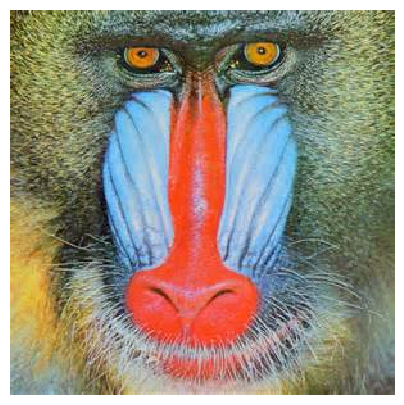

In [73]:
image1 = load(image1_path)

display(image1)

## Question 2.2 (5 points)
One of the most common operations we perform when working with images is rectangular **cropping**, or the action of removing unwanted outer areas of an image.

Take a look at this code we've written to crop out everything but the eyes of our baboon from above:

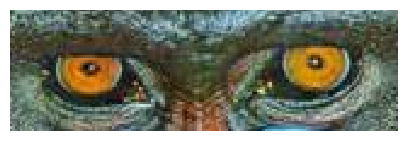

In [74]:
display(image1[10:60, 70:230, :])

Implement the `crop_image()` method by taking in the starting row index, starting column index, number of rows, and number of columns, and outputting the cropped image.

Then, in the cell below, see if you can pull out a 100x100 square from each corner of the original `image1`: the top left, top right, bottom left, and bottom right.

In [75]:
def crop_image(image, start_row, start_col, num_rows, num_cols):
    """Crop an image based on the specified bounds.

    Args:
        image: numpy array of shape(image_height, image_width, 3).
        start_row (int): The starting row index we want to include in our cropped image.
        start_col (int): The starting column index we want to include in our cropped image.
        num_rows (int): Number of rows in our desired cropped image.
        num_cols (int): Number of columns in our desired cropped image.

    Returns:
        out: numpy array of shape(num_rows, num_cols, 3).
    """

    return image[start_row:start_row+num_rows, start_col:start_col+num_cols, :]

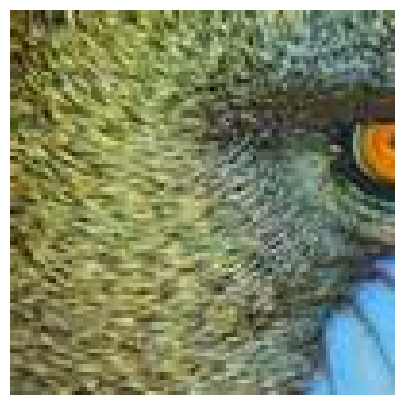

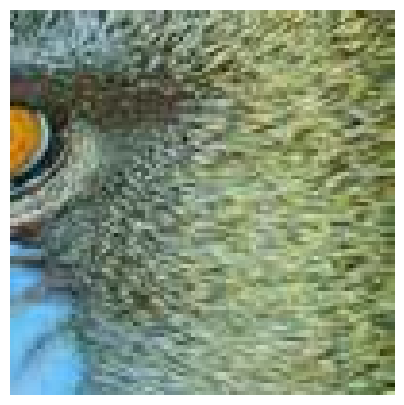

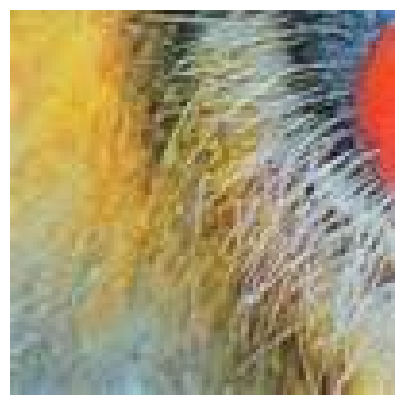

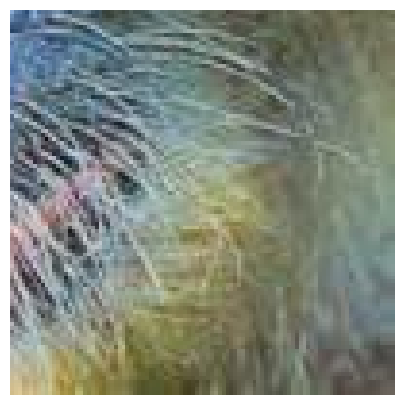

In [76]:
r, c = image1.shape[0], image1.shape[1]

top_left_corner = crop_image(image1, 0, 0, 100, 100)
top_right_corner = crop_image(image1, 0, c-100, 100, 100)
bottom_left_corner = crop_image(image1, r-100, 0, 100, 100)
bottom_right_corner = crop_image(image1, r-100, c-100, 100, 100)

display(top_left_corner)
display(top_right_corner)
display(bottom_left_corner)
display(bottom_right_corner)

## Question 2.3 (10 points)
Implement the `dim_image()` method by converting images according to  $x_n = 0.5*x_p^2$ for every pixel, where $x_n$ is the new value and $x_p$ is the original value.

Note: Since all the pixel values of the image are in the range $[0, 1]$, the above formula will result in reducing these pixels values and therefore make the image dimmer.

In [82]:
def dim_image(image):
    return 0.5 * image ** 2

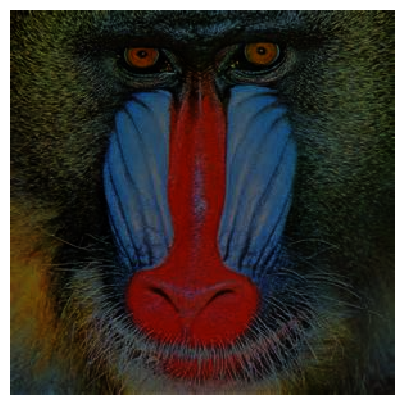

In [83]:
new_image = dim_image(image1)
display(new_image)

## Question 2.4 (10 points)
Let's try another commonly used operation: image resizing!

At a high level, image resizing should go something like this:

1. We create an (initially empty) output array of the desired size, `output_image`
2. We iterate over each pixel position `(i,j)` in the output image
    - For each output pixel, we compute a corresponding input pixel `(input_i, input_j)`
    - We assign `output_image[i, j, :]` to `input_image[input_i, input_j, :]`
3. We return the resized output image

We want `input_i` and `input_j` to increase proportionally with `i` and `j` respectively:

- `input_i` can be computed as `int(i * row_scale_factor)`
- `input_j` can be computed as `int(j * col_scale_factor)`

...where `int()` is a Python operation takes a float and rounds it down to the nearest integer, and `row_scale_factor` and `col_scale_factor` are constants computed from the image input/output sizes.

Try to figure out what `row_scale_factor` and `col_scale_factor` should be, then implement this algorithm in the `resize_image()` method! Then, run the cells below to test out your image resizing algorithm!

When you downsize the baboon to 16x16, you should expect an output that looks something like this:

![16_16_baboon.png](16_16_baboon.png)


When you stretch it horizontally to 50x400, you should get:

![50_400_baboon.png](50_400_baboon.png)

In [86]:
def resize_image(input_image, output_rows, output_cols):
    """Resize an image using the nearest neighbor method.

    Args:
        input_image (np.ndarray): RGB image stored as an array, with shape
            `(input_rows, input_cols, 3)`.
        output_rows (int): Number of rows in our desired output image.
        output_cols (int): Number of columns in our desired output image.

    Returns:
        np.ndarray: Resized image, with shape `(output_rows, output_cols, 3)`.
    """
    input_rows, input_cols, channels = input_image.shape
    assert channels == 3

    # 1. Create the resized output image
    output_image = np.zeros(shape=(output_rows, output_cols, 3))

    row_scale_factor = input_rows / output_rows
    col_scale_factor = input_cols / output_cols

    for row in range(output_rows):
        for col in range(output_cols):
            output_image[row, col, :] = input_image[int(row * row_scale_factor), int(col * col_scale_factor), :]

    # 3. Return the output image
    return output_image

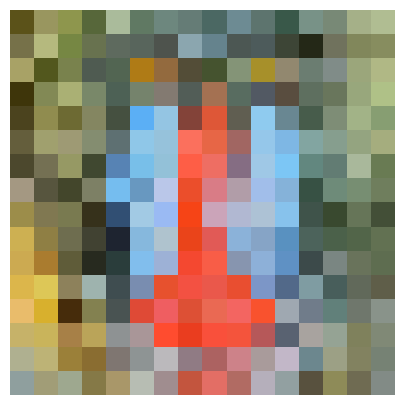

In [87]:
display(resize_image(image1, 16, 16))

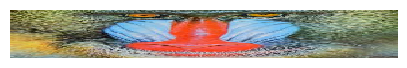

In [88]:
display(resize_image(image1, 50, 400))

**Question:** In the resize algorithm we describe above, the output is populated by iterating over the indices of the output image. Could we implement image resizing by iterating over the indices of the input image instead? How do the two approaches compare?

> *Your response here!*

## Question 2.5 (15 points)

One more operation that you can try implementing is **image rotation**. This is part of a real interview question that we've encountered for actual computer vision jobs (notably at Facebook), and we expect it to require quite a bit more thinking.

#### a) Rotating 2D coordinates (5 points)

Before we start thinking about rotating full images, let's start by taking a look at rotating `(x, y)` coordinates:

![coordinate_rotation.png](coordinate_rotation.png)

Using `np.cos()` and `np.sin()`, implement the `rotate2d()` method to compute the coordinates $(x', y')$ rotated by theta radians from $(x, y)$.

Once you've implemented the function, test your implementation below using the assert statements (if it prints nothing, then your implementation is correct):

In [89]:
def rotate2d(point, theta):
    """Rotate a 2D coordinate by some angle theta.

    Args:
        point (np.ndarray): A 1D NumPy array containing two values: an x and y coordinate.
        theta (float): An theta to rotate by, in radians.

    Returns:
        np.ndarray: A 1D NumPy array containing your rotated x and y values.
    """

    assert point.shape == (2,)
    assert isinstance(theta, float)

    M = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

    return np.dot(M, point)

In [90]:
assert rotate2d(np.array([1.0, 0.0]), 0.0).shape == (
    2,
), "Output shape incorrect!"
assert np.allclose(
    rotate2d(np.array([1.0, 0.0]), 0.0), np.array([1.0, 0.0])
), ""
assert np.allclose(
    rotate2d(np.array([1.0, 0.0]), np.pi / 2.0), np.array([0.0, 1.0])
), ""

Run the cell below to visualize a point as it's rotated around the origin by a set of evenly-spaced angles! You should see 30 points arranged in a circle.

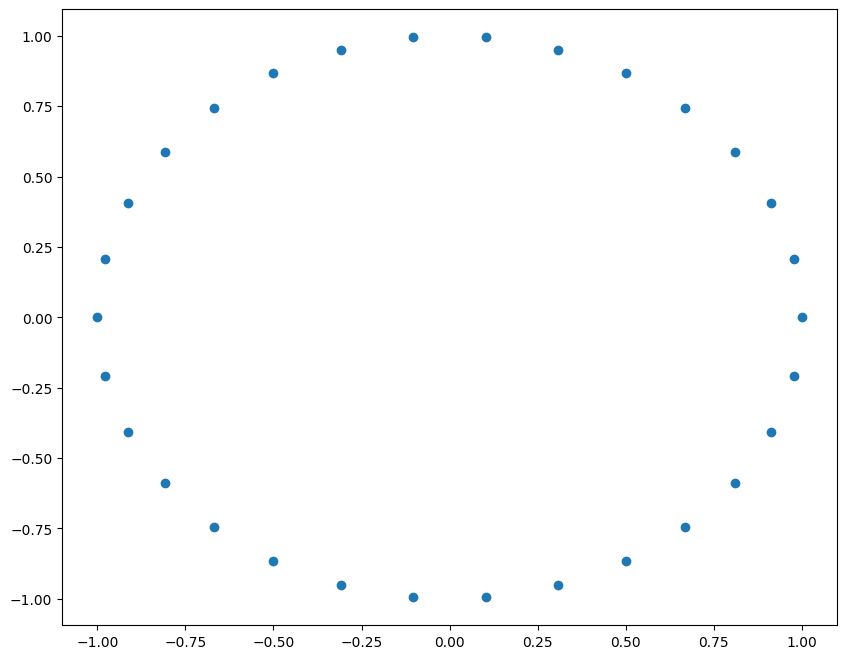

In [91]:
# Visualize a point being rotated around the origin
# We'll use the matplotlib library for this!
import matplotlib.pyplot as plt

points = np.zeros((30, 2))
for i in range(30):
    points[i, :] = rotate2d(np.array([1.0, 0.0]), i / 30.0 * (2 * np.pi))

plt.scatter(points[:, 0], points[:, 1])
plt.show()

**Question:** Our function currently only rotates input points around the origin (0,0). Using the same `rotate2d` function, how could we rotate the point around a center that wasn't at the origin? **You'll need to do this when you implement image rotation below!**

> *Your response here!*

#### b) Rotate Image (10 points)

Finally, use what you've learned about 2D rotations to create and implement the `rotate_image(input_image, theta)` function!

For an input angle of $\pi/4$ (45 degrees), the expected output is:

![rotated_output.png](rotated_output.png)

**Hints:**
- We recommend basing your code off your `resize_image()` implementation, and applying the same general approach as before. Iterate over each pixel of an output image `(i, j)`, then fill in a color from a corresponding input pixel `(input_i, input_j)`. In this case, note that the output and input images should be the same size.
- If you run into an output pixel whose corresponding input coordinates `input_i` and `input_j` that are invalid, you can just ignore that pixel or set it to black.
- In our expected output above, we're rotating each coordinate around the center of the image, not the origin. (the origin is located at the top left)

In [98]:
def rotate_image(input_image, theta):
    """Rotate an image by some angle theta.

    Args:
        input_image (np.ndarray): RGB image stored as an array, with shape
            `(input_rows, input_cols, 3)`.
        theta (float): Angle to rotate our image by, in radians.

    Returns:
        (np.ndarray): Rotated image, with the same shape as the input.
    """

    input_rows, input_cols, channels = input_image.shape
    assert channels == 3

    output_image = np.zeros_like(input_image)

    center_row = input_rows / 2
    center_col = input_cols / 2

    for row in range(input_rows):
        for col in range(input_cols):
            translated_point = np.array([row - center_row, col - center_col])
            translated_point = rotate2d(translated_point, theta)

            input_row = int(translated_point[0] + center_row)
            input_col = int(translated_point[1] + center_col)

            if 0 <= input_row < input_rows and 0 <= input_col < input_cols:
                output_image[row, col, :] = input_image[input_row, input_col, :]

    return output_image

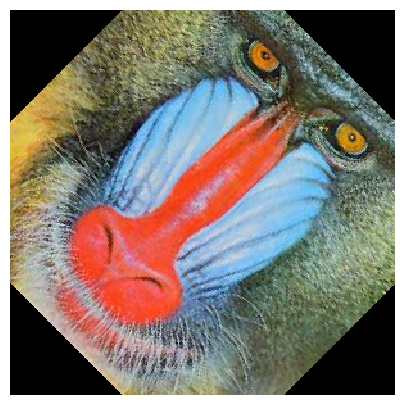

In [99]:
# Test that your output matches the expected output
display(rotate_image(image1, np.pi / 4.0))